## derive loudness function

Fit a polynomial to the 60 phon equal loudness contour (ISO 226) shifted down by 50 dB.

Using the 60 phon equal loudness contour data from Lawrence Yule https://chart-studio.plotly.com/~mrlyule


The derived magnitude spectrum ("poly" below) is added to the speech spectrum to boost spectral components with A-weighting, enhancing more audible components.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

(30,) (30,)
22.569635173814934 - 11.46415720443573·x¹ - 52.58189033888564·x² +
226.9735935491338·x³ + 41.050673354648445·x⁴ - 1415.8590269829872·x⁵ +
925.5343356963114·x⁶ + 5216.88407834946·x⁷ - 5157.926315918423·x⁸ -
10245.929628698792·x⁹ + 11386.571505218226·x¹⁰ + 9702.653804613637·x¹¹ -
11213.730580612279·x¹² - 3484.648290789997·x¹³ + 4079.036894770733·x¹⁴
[   20.    30.    40. ... 19970. 19980. 19990.]


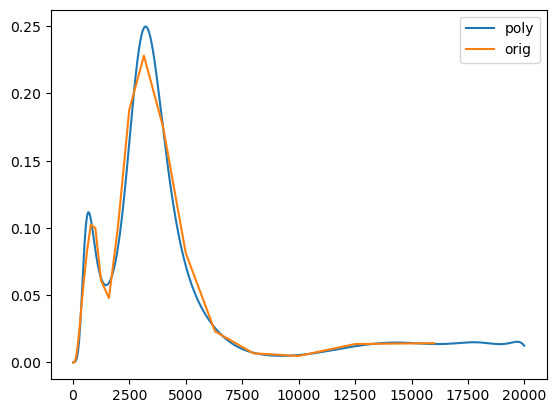

In [29]:
# 60 phon equal loudness contour data from Lawrence Yule https://chart-studio.plotly.com/~mrlyule
frequency  = np.array([20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500,
        630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000,
        12500, 16000])
dB = np.array([109.51, 104.23, 99.08, 94.18, 89.96, 85.94, 82.05, 78.65, 75.56,
        72.47, 69.86, 67.53, 65.39, 63.45, 62.05, 60.81, 59.89, 60.01, 62.15, 63.19, 
        59.96, 57.26, 56.42, 57.57, 60.89, 66.36, 71.66, 73.16, 68.63, 68.43 ])

dB -= 50

freqs = np.arange(20.0,20000.0,10)
new_dB = np.interp(freqs, frequency, dB)

print(frequency.shape,dB.shape)

p = Polynomial.fit(freqs, new_dB, deg=14)
print(p)

p2 = Polynomial([22.57, -11.46, -52.58, 226.97, 41.05, -1415.86, 
                 925.53, 5216.88, -5157.93, -10245.93, 11386.57, 
                 9702.65, -11213.73, -3484.65, 4079.037], domain=[20,20000])

print(freqs)
poly = p2(freqs)

plt.plot(freqs,10**(-poly/10),label="poly")
plt.plot(frequency,10**(-dB/10),label="orig")

#plt.plot(freqs,poly,label="poly")
#plt.plot(frequency,dB,label="orig")
#plt.xscale('log')
plt.legend()